# Unit 5 - Root Finding
## Task 2

In [15]:
import MyFunc
import numpy as np

# prompt user for parameter to solve
ans = input("Provide 2 parameters out of these three variables: theta, beta, mach (e.g. theta = 5 beta = 40)")
ans = ans.lower()

if "beta" not in ans:
    b = ans.split() # split answer
    
    # search answer for theta and mach
    for i in range(len(b)):
        if b[i] == "theta":
            theta = float(b[i+2])
        elif b[i] == "mach":
            M = float(b[i+2])
    theta *= (np.pi/180) # convert degrees to radians

    # initialize shock angle mach equation and derivative w/ respect to beta
    def f_beta(beta,M=M,theta=theta): return 2*(1/np.tan(beta))*((M**2*((np.sin(beta))**2)-1)/(M**2*(1.4+np.cos(2*beta))+2)) - np.tan(theta)
    def df_beta(beta,M=M):
        numerator = -2 * M**2 * np.sin(2 * beta) * (1 / np.tan(beta)) * (M**2 * (np.sin(beta))**2 - 1) - (-1 / (np.sin(beta)**2) * (-1 + M**2 * (np.sin(beta))**2) + M**2 * np.sin(2 * beta) * (1 / np.tan(beta))) * (M**2 * (1.4 + np.cos(2 * beta)) + 2)
        denominator = (M**2 * (1.4 + np.cos(2 * beta)) + 2)**2 * (np.sin(beta))**2
        return numerator / denominator
    
    # original bracket for rootsearch
    x1 = .01
    x2 = np.pi/2

    # rootSearch function to bracket root
    for i in range(4):
        dx = (x2 - x1)/(2.0)
        x1,x2 = MyFunc.rootsearch(f_beta,x1,x2,dx)

    # import newtonRaphson
    x = MyFunc.newtonRaphson(f_beta,df_beta,x1,x2)

    # convert back to degrees and print
    print("beta = ", x*180/np.pi)

elif "theta" not in ans: 
    b = ans.split() # split answer
   
    # search for values of beta and mach
    for i in range(len(b)): 
        if b[i] == "beta":
            beta = float(b[i+2])
        elif b[i] == "mach":
            M = float(b[i+2])
    
    # convert to radians
    beta *= np.pi/180

    # function and derivative w/ respect to theta
    def f_theta(theta,M=M,beta=beta): return 2*(1/np.tan(beta))*((M**2*((np.sin(beta))**2)-1)/(M**2*(1.4+np.cos(2*beta))+2)) - np.tan(theta)
    def df_theta(theta): return -1/(np.cos(theta))**2

    # original bracket
    x1 = .01
    x2 = np.pi/2

    # rootsearch to bracket again
    for i in range(4):
        dx = (x2 - x1)/(2.0)
        x1,x2 = MyFunc.rootsearch(f_theta,x1,x2,dx)

    # import newtonRaphson
    x = MyFunc.newtonRaphson(f_theta,df_theta,x1,x2)

    # back to degrees and output
    print("theta = ", x*180/np.pi)

else:
    b = ans.split() # split answer
    
    # search for values of beta and mach
    for i in range(len(b)):
        if b[i] == "beta":
            beta = float(b[i+2])
        elif b[i] == "theta":
            theta = float(b[i+2])
    # convert to radians
    beta *= np.pi/180
    theta *= np.pi/180

    # original equation and derivative w/ respect to M (Mach)
    def f_Mach(M,beta=beta,theta=theta): return 2*(1/np.tan(beta))*((M**2*((np.sin(beta))**2)-1)/(M**2*(1.4+np.cos(2*beta))+2)) - np.tan(theta)
    def df_Mach(M,beta=beta):
        numerator = 2 * (1 / np.tan(beta)) * (4 * M * np.sin(beta)**2 + 2 * M * np.cos(2 * beta) + 2.8 * M)
        denominator = (M**2 * (np.cos(2 * beta) + 1.4) + 2)**2
        return  numerator / denominator
    # original bracket
    x1 = 0.0
    x2 = 20.0

    # rootsearch
    for i in range(4):
        dx = (x2 - x1)/2.0
        x1,x2 = MyFunc.rootsearch(f_Mach,x1,x2,dx)

    # newtonRaphson
    x = MyFunc.newtonRaphson(f_Mach,df_Mach,x1,x2)

    # output
    print("Mach = ", x)
    



Provide 2 parameters out of these three variables: theta, beta, mach (e.g. theta = 5 beta = 40) theta = 5 mach = 1.8


beta =  38.44398276881643


## Task 3
### Problem Set 4.1 #19

In [5]:
import MyFunc
import numpy as np
from numpy import sign

# initialize values
u = 2510
M0 = 2.8e6
m = 13.3e3
g = 9.81

# define expression
def v(t): return (u * np.log(M0 / (M0 - m * t)) - g * t) - 335

# bracket root
x1 = 1

x2 = 100

# import bisection to solve for root
time = MyFunc.bisection(v,x1,x2,switch=1,tol=1.0e-9)

# output
print("time for rocket to reach speed of sound (335 m/s): {0} seconds".format(time))


time for rocket to reach speed of sound (335 m/s): 70.87797226796465 seconds


## Task 4
### Problem Set 4.2 #3

In [3]:
import MyFunc
import numpy as np
import sympy as sp

# define f and derivative of f
def f(x): return x**5 - 30*x**4 + 361*x**3 - 2178*x**2 +6588*x - 7992
     
def df(x): return 5*x**4 - 120*x**3 + 1083*x**2 - 4356*x + 6588

# bracket root
x1 = 1
x2 = 10

# newtonRaphson
root = MyFunc.newtonRaphson(f,df,x1,x2)

# output
print("Root is: ",root)

# store coefficients for original equation starting from x^0 
c = np.array([-7992.0,6588.0,-2178.0,361.0,-30.0,1.0])

# provide root for deflPoly
root = 6
b = MyFunc.deflPoly(c,root)

# output
print('\nDeflated Polynomial:\n{0}x^4 + {1}x^3 + {2}x^2 + {3}x + {4}'.format(b[4],b[3],b[2],b[1],b[0]))


Root is:  5.999739303921316

Deflated Polynomial:
1.0x^4 + -24.0x^3 + 217.0x^2 + -876.0x + 1332.0


### Problem Set 4.2 #10

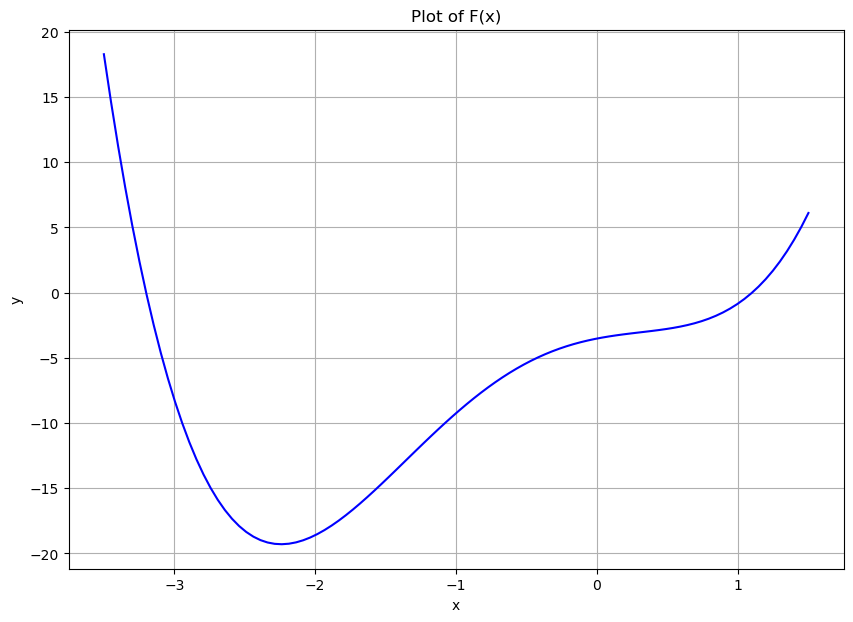

zeros =  [1.0999999999999999, -3.2]


In [4]:
import numpy as np
import cmath
from random import random
import MyFunc
import matplotlib.pyplot as plt

# initialize x and f for plotting
x = np.linspace(-3.5, 1.5, 100)
def f(x): return x**4 + 2.1*x**3 - 2.52*x**2 + 2.1*x - 3.52
# Create array for f based on x values
F = f(x)

# Plot data and curve
fig, ax = plt.subplots()
ax.plot(x,F,"b")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Plot of F(x)")
fig.set_size_inches([10,7])
ax.grid(True)
plt.show()

# initialize root list
xs = []

# derivative of f for newtonRaphson
def df(x): return 4*x**3 + 6.3*x**2 - 5.04*x + 2.1

# bracket #1 for root based on plot
x1 = 1.0
x2 = 1.5
p1 = MyFunc.newtonRaphson(f,df,x1,x2)

# add value to root list
xs.append(p1)

# bracket #2 for other root based on plot
x1 = -3.0
x2 = -3.5
p2 = MyFunc.newtonRaphson(f,df,x1,x2)

# add value to root list
xs.append(p2)

# output
print("zeros = ", xs)


